<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# library for statistical analysis
import scipy.stats as stats

from sklearn.model_selection import train_test_split
import time

# End to end OS machine learning platform
import tensorflow as tf
# High level neural network framework for deep learning
from tensorflow import keras
# Abstraction layer for neural network backend engines
from keras import backend
# Model for building NN sequentially
from keras.models import Sequential
# For creating fully connected NN layers
from keras.layers import Dense

In [2]:
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/AI_ML_PGP/Projects/BankChurnPrediction/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = data.copy() # Copy the master data

## Data Overview

In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [9]:
df.isnull().sum() # checking for missing values

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df.duplicated().sum() # checking for duplicate values

0

In [11]:
df['CustomerId'].nunique() # checking for unique values in CustomerId column

10000

In [12]:
df['Geography'].value_counts(dropna = False) # checking distinct values in Geography column

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['Gender'].value_counts(dropna = False) # checking distinct values in Gender column

,count
Gender,
Male,5457
Female,4543


In [14]:
df['Exited'].value_counts(normalize=True) # checking distinct values in Exited column

,proportion
Exited,
0,0.7963
1,0.2037


In [15]:
df['Tenure'].value_counts(dropna = False) # checking distinct values in Tenure column

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [16]:
df['HasCrCard'].value_counts(dropna = False) # checking distinct values in HasCrCard column

,count
HasCrCard,
1,7055
0,2945


In [17]:
df['IsActiveMember'].value_counts(dropna = False) # checking distinct values in IsActiveMember column

,count
IsActiveMember,
1,5151
0,4849


### Observations
* There are 10,000 rows and 14 columns in the dataset
* `Surname`, `Geography` and `Gender` features have data type object and rest of the features have numeric data types.
* `CustomerId` is the unique customer identifier which we can drop
* We will also drop `Surname` and `RowNumber` as these features are just identifiers and not required for data analysis and model building.
* Dataset doesn't have any missing value
* Dataset doesn't have any duplicate value
* `HasCrCard` and `IsActiveMember` are numerical representations of the respective categorical features. They are mapped to 1 and 0 for Yes and No values respectively.
* `Exited` is our target variable, it has following classes: <br />
&nbsp;&nbsp;&nbsp;&nbsp; **O**: Customer didn't leave the bank <br />
&nbsp;&nbsp;&nbsp;&nbsp; **1**: Customer left the bank <br />

Our goal is to build neural network models to predict whether a customer will leave the bank in the next 6 months(Negative outcome) or will not leave the bank in the next 6 months(Positive outcome)

### Dropping `CustomerId`, `Surname` and `RowNumber`

In [18]:
df.drop(['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)

In [19]:
df.shape

(10000, 11)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.duplicated().sum()

0

In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


* The statistical summary of the dataset are unaffected after dropping `CustomerId`, `Surname` and `RowNumber`

## Exploratory Data Analysis

In [23]:
cat_cols = ['Geography','Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
num_cols = [col for col in df.columns if col not in cat_cols]
cat_cols, num_cols

(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'],
 ['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'EstimatedSalary'])

### Utility functions

In [24]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [26]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title(f"Distribution of {predictor} vs {str(target_uniq[0])}")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title(f"Distribution of {predictor} vs {str(target_uniq[1])}")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title(f"Boxplot - target vs {predictor}")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title(f"Boxplot (without outliers) - target vs {predictor}")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Univariate analysis for numerical feature

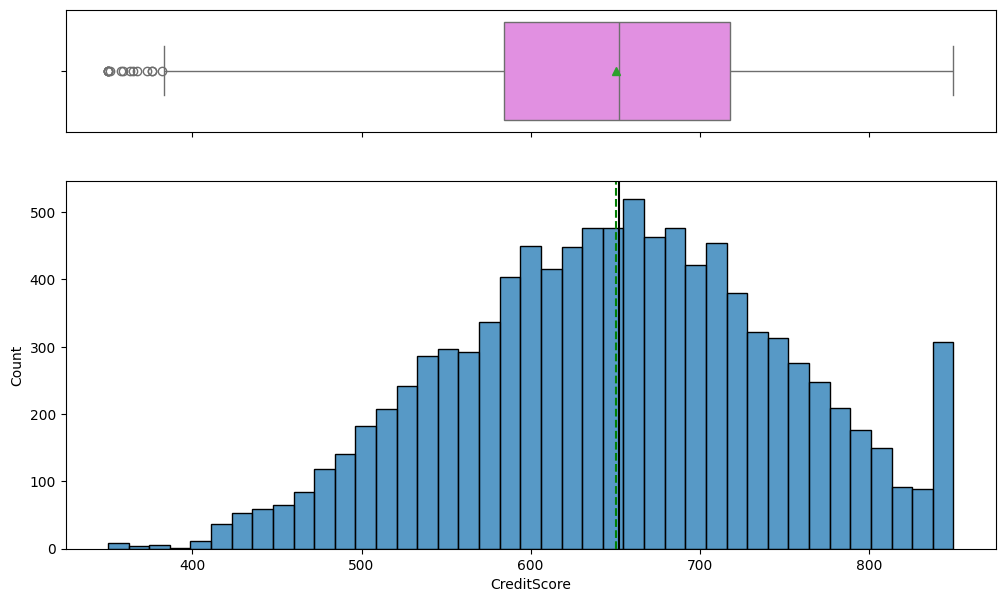

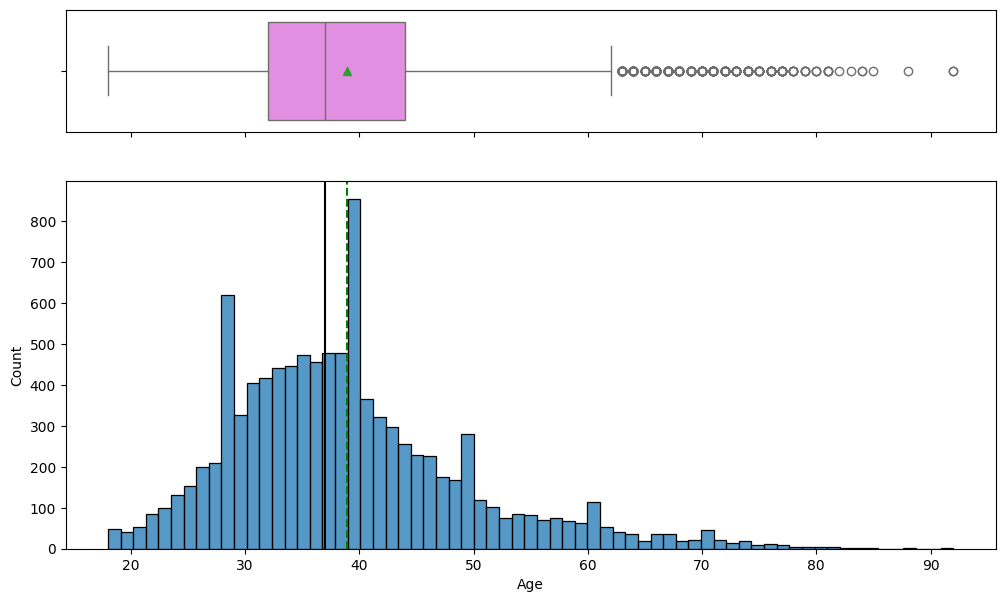

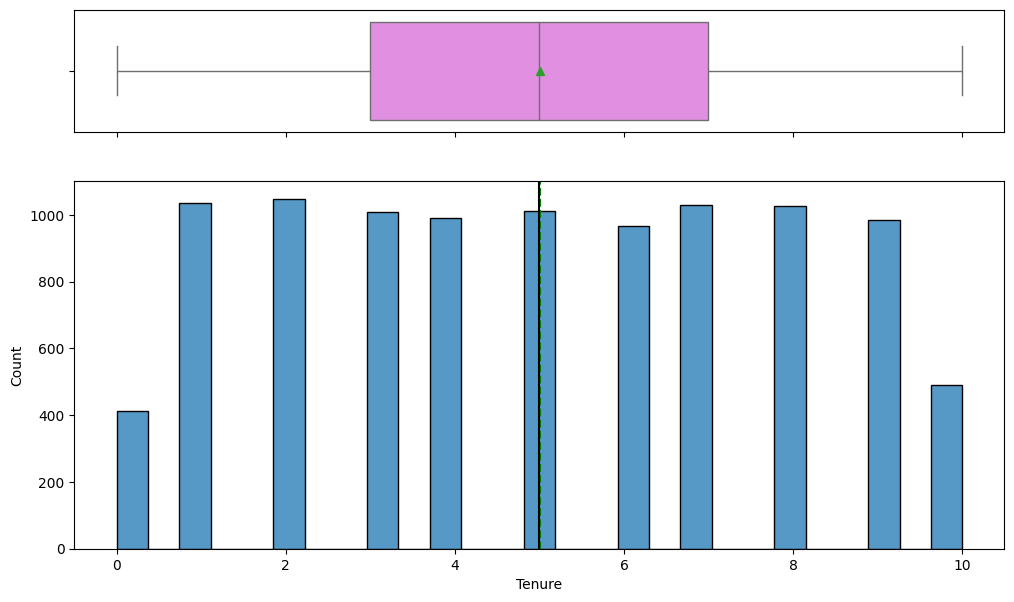

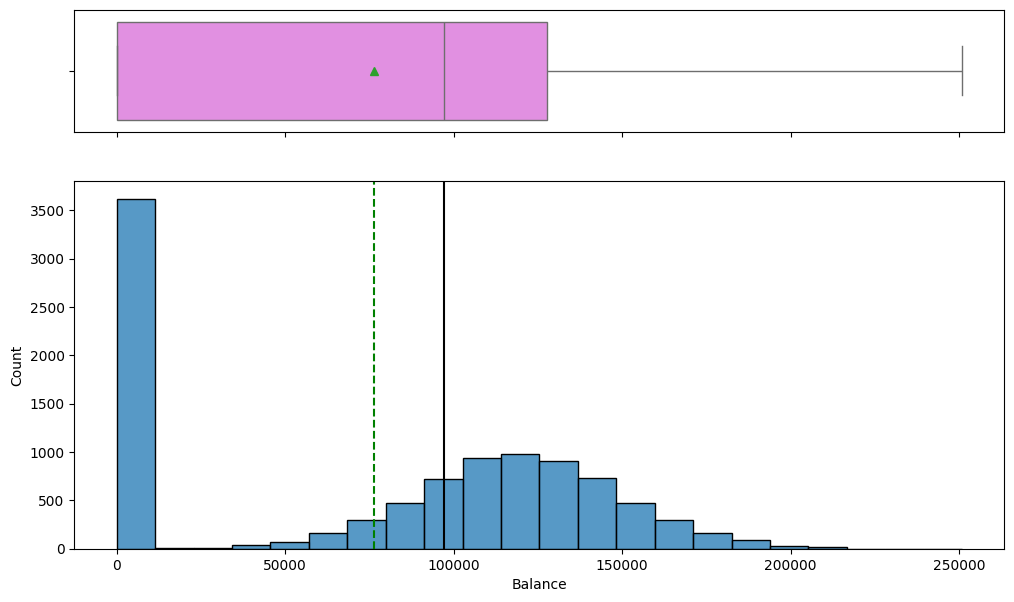

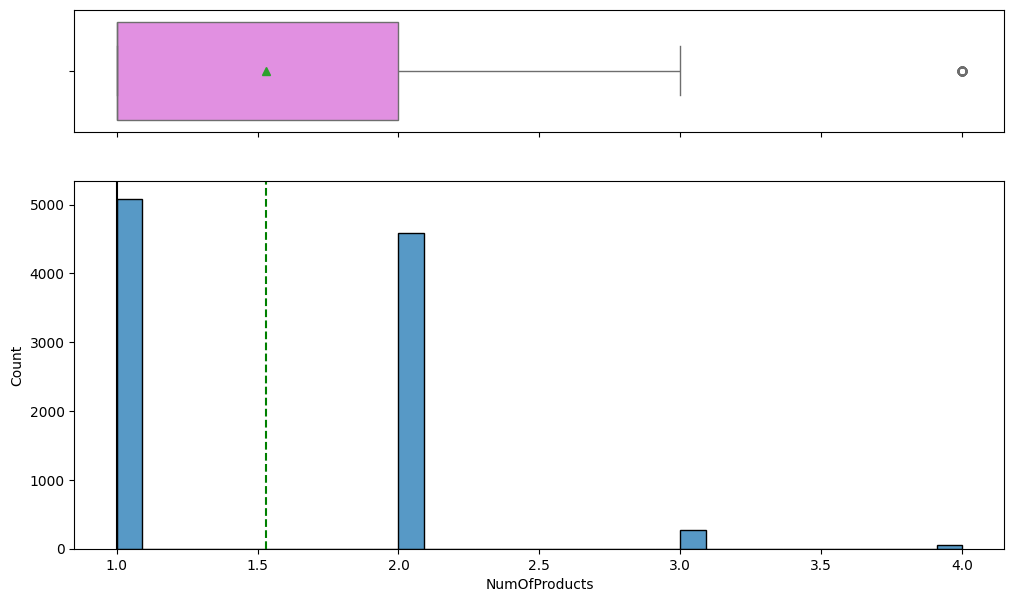

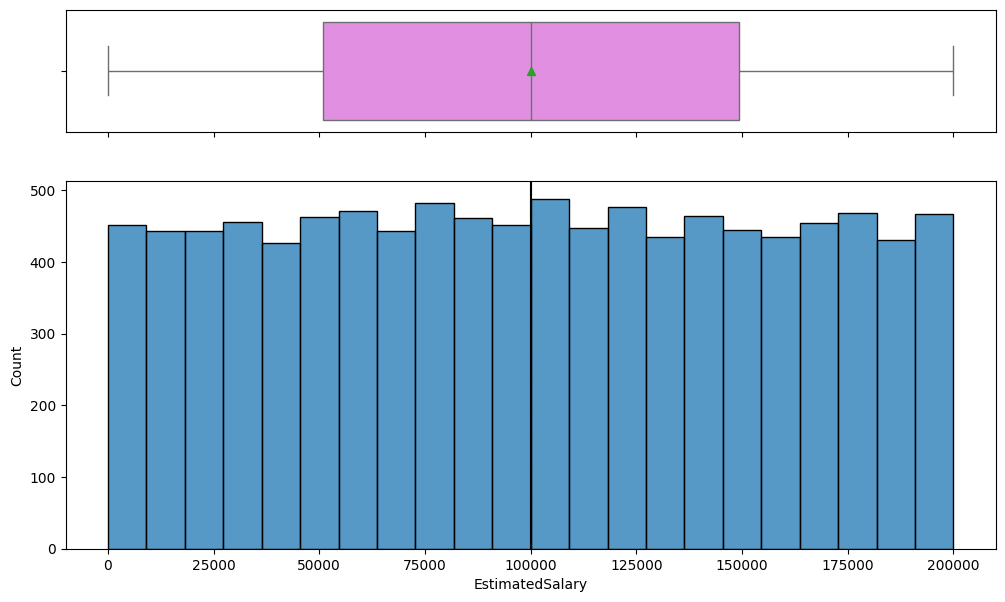

In [28]:
for col in num_cols:
  histogram_boxplot(df, col)

#### Univariate analysis of categorical feature

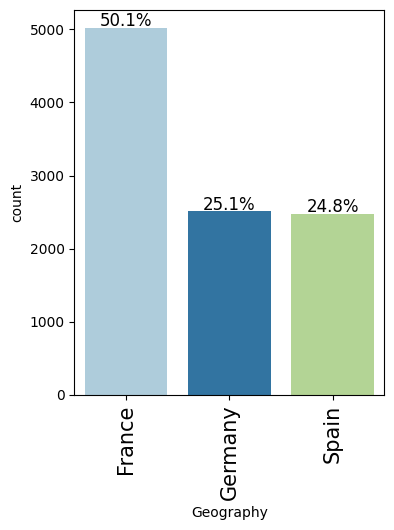

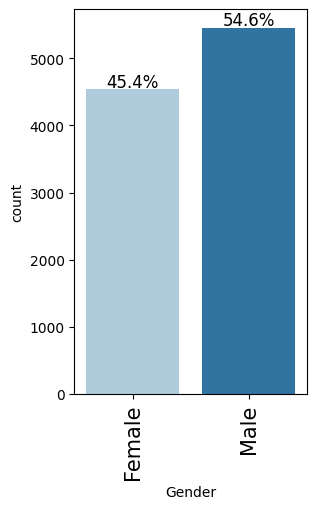

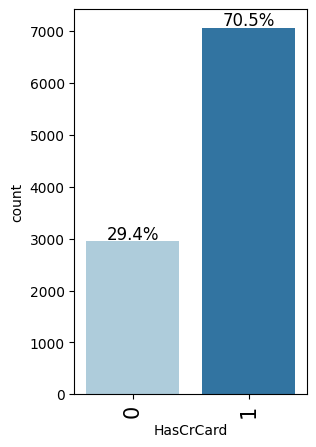

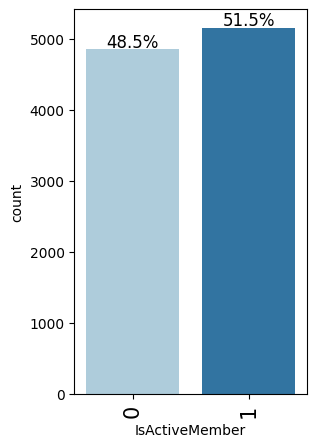

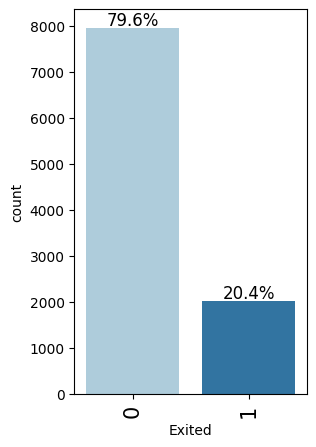

In [29]:
for col in cat_cols:
  labeled_barplot(df, col, perc=True)

#### Observations
* 75% customers have credit score over 584. There are some outliers with very low credit score, making the overall distribution slightly left skewed.
* 75%  customers are 44 years old or younger than 44.However, there are some outliers in the distribution with high age, pushing the mean age higher than the median age and making the overall distribution right skewed. There are few customers who are over 80 years old. The maximum age is 92.
* 75% customers have been with the bank over 3 years.
* 25% customers have balance 0 in their account and 25% customers have balance over 127644.24.
* 75% customers have 2 or 1 products with the bank. There are few customers who have 4 products with the bank.
* Average estimated salary is around 100k and 75% bank customers have estimated salary around 149k or less
* The bank has customers from 3 geographical location, France, Germany and Spain. Around 50% customers are from France.
* The bank has more male customers than female customers, 54.6% vs 45.4%
* 29.4% customers don't have any credit card
* Around 48.5% customers are not using bank product regularly or not making regular transaction
* 20.4% customers left the bank in the last 6 months.

### Bivariate Analysis

#### Distribution of categorical feature against the target variable

In [30]:
# Removing target variable from categorical column
target = 'Exited'
cat_cols.remove(target)

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


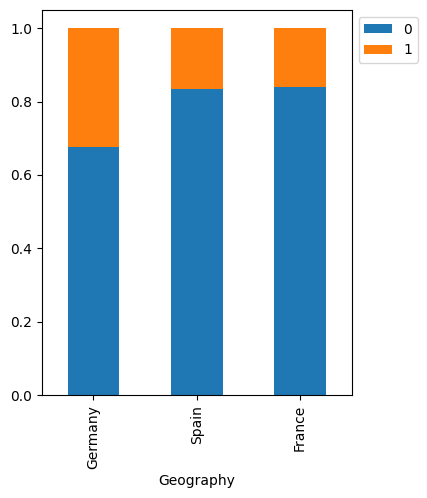

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


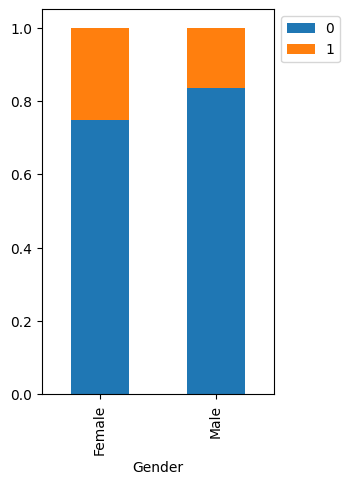

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


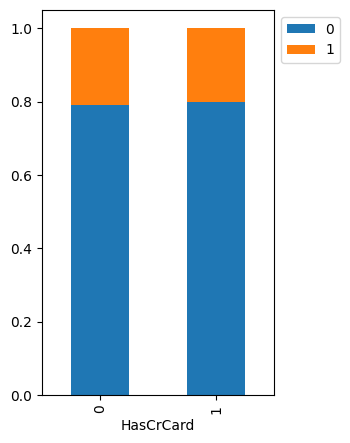

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


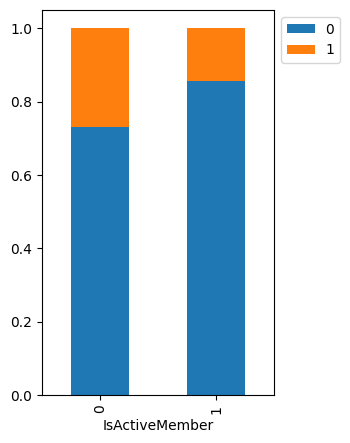

In [33]:
for col in cat_cols:
  stacked_barplot(df, col, target)

#### Distribution of numerical feature against the target variable

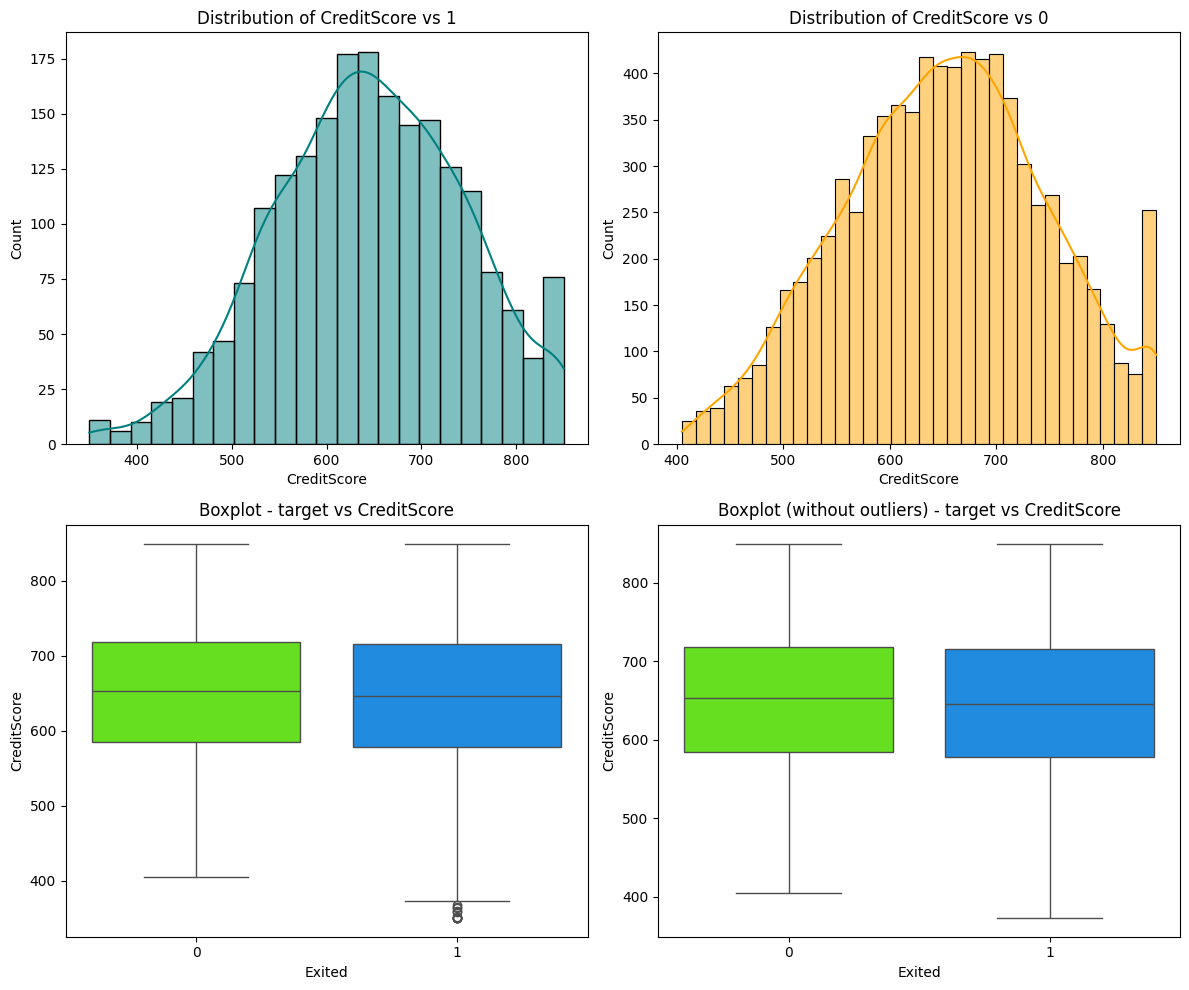

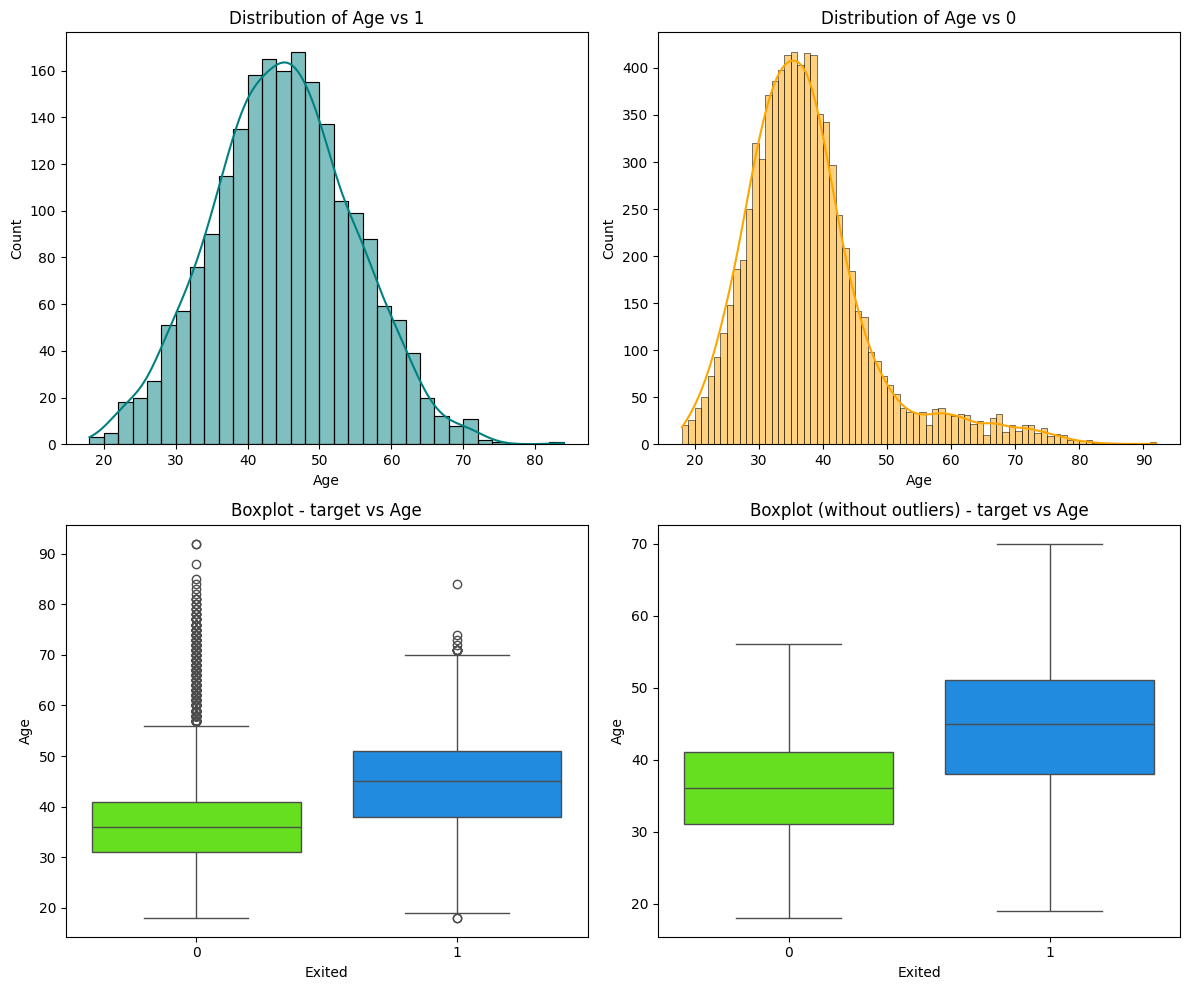

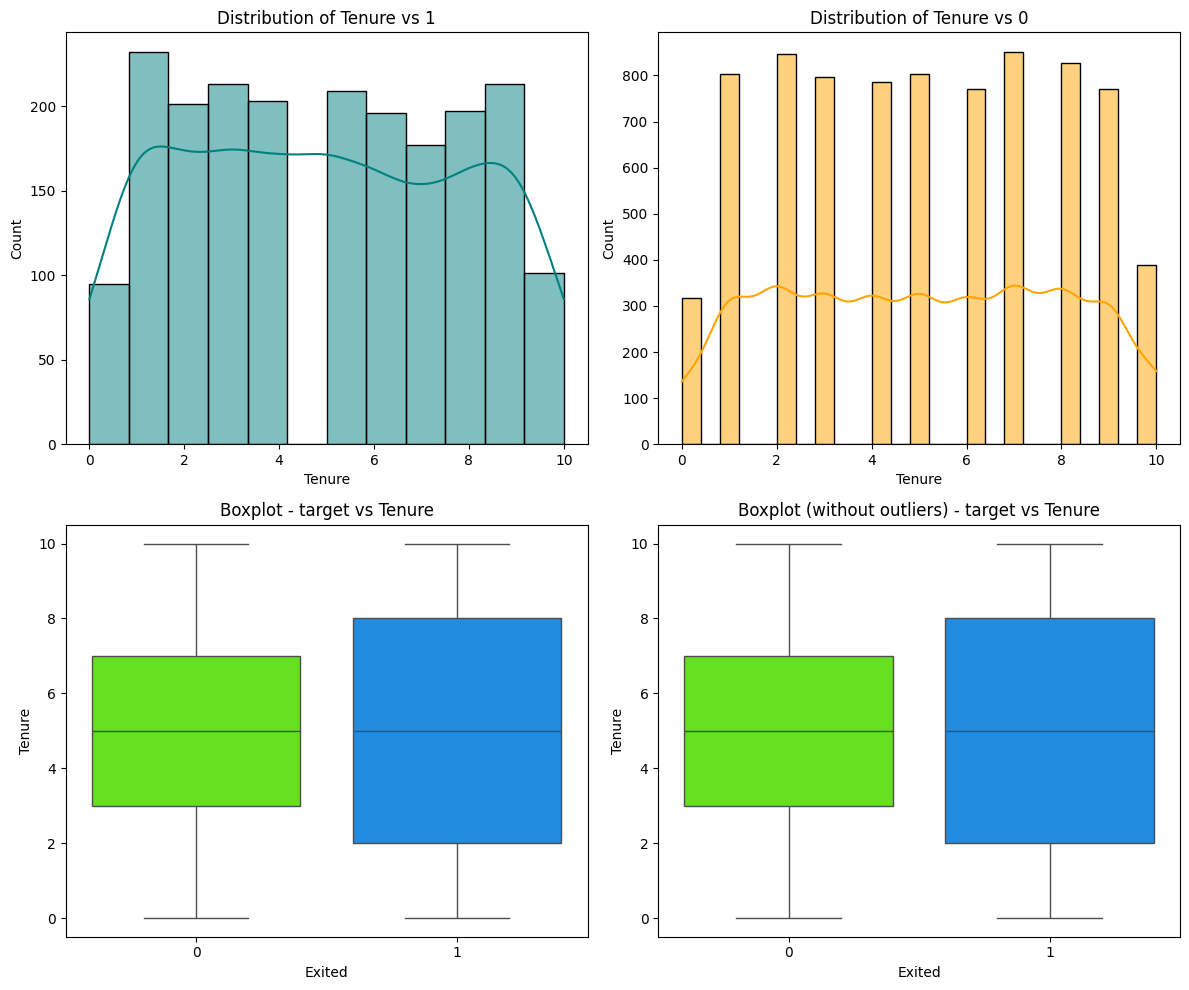

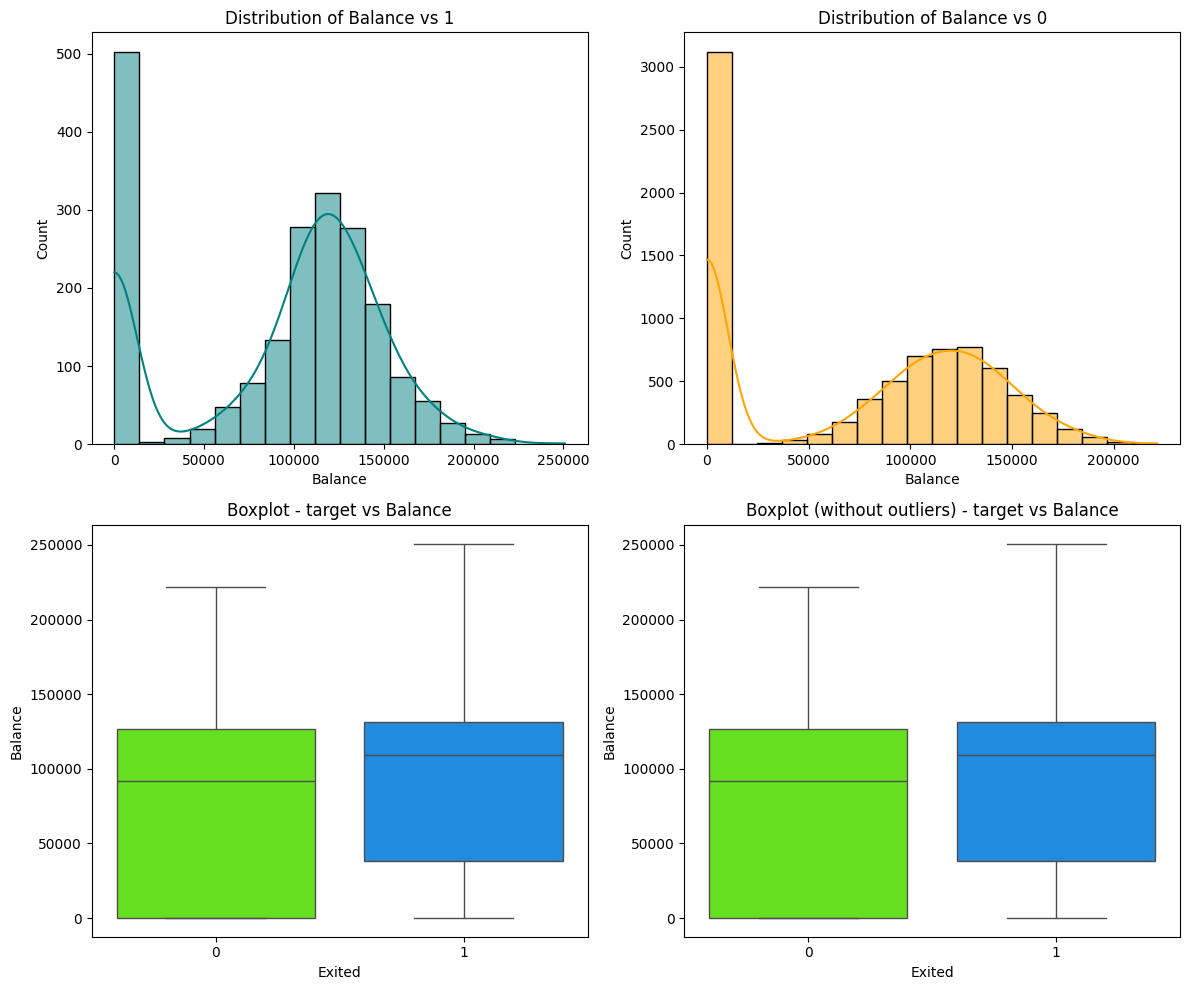

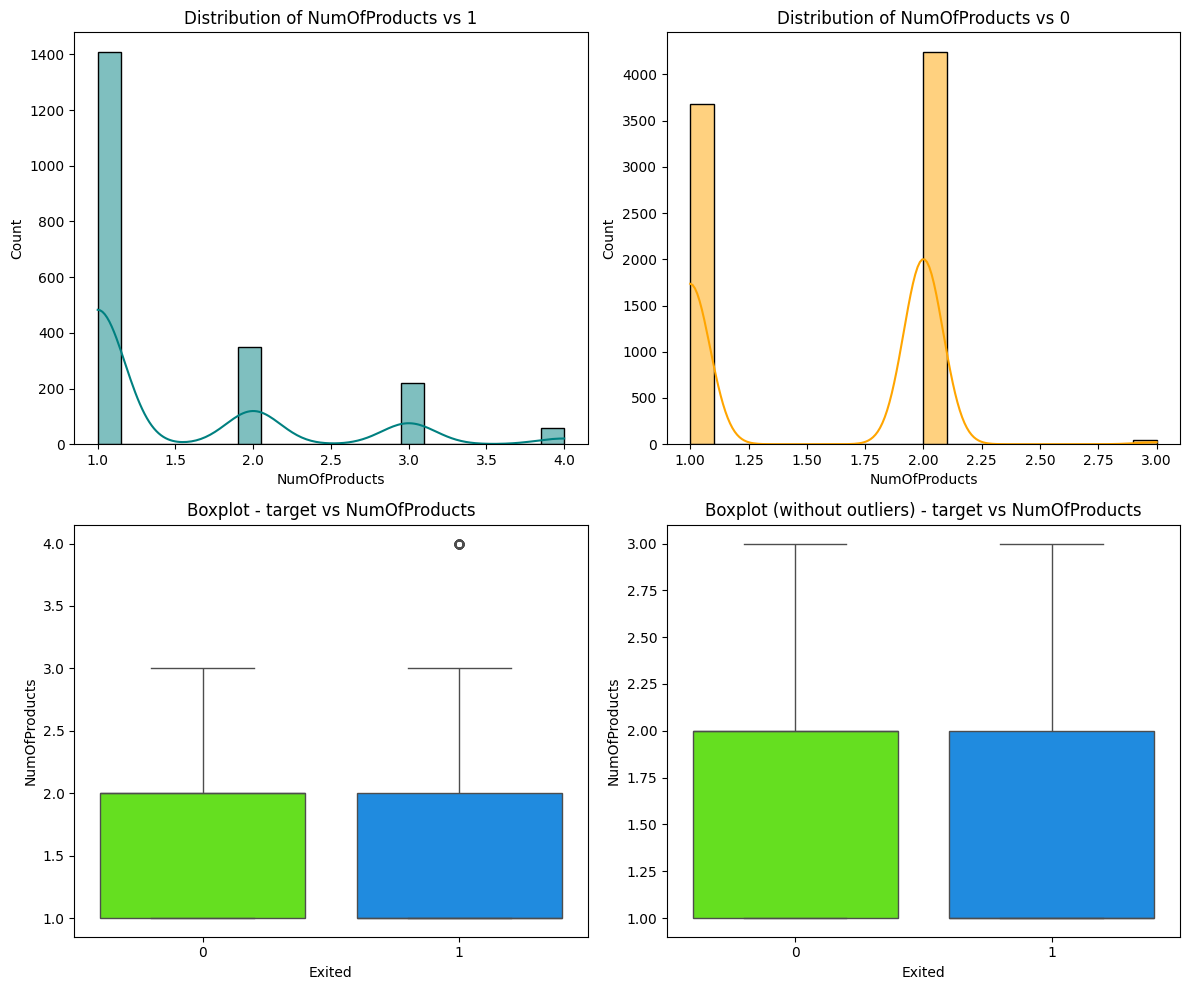

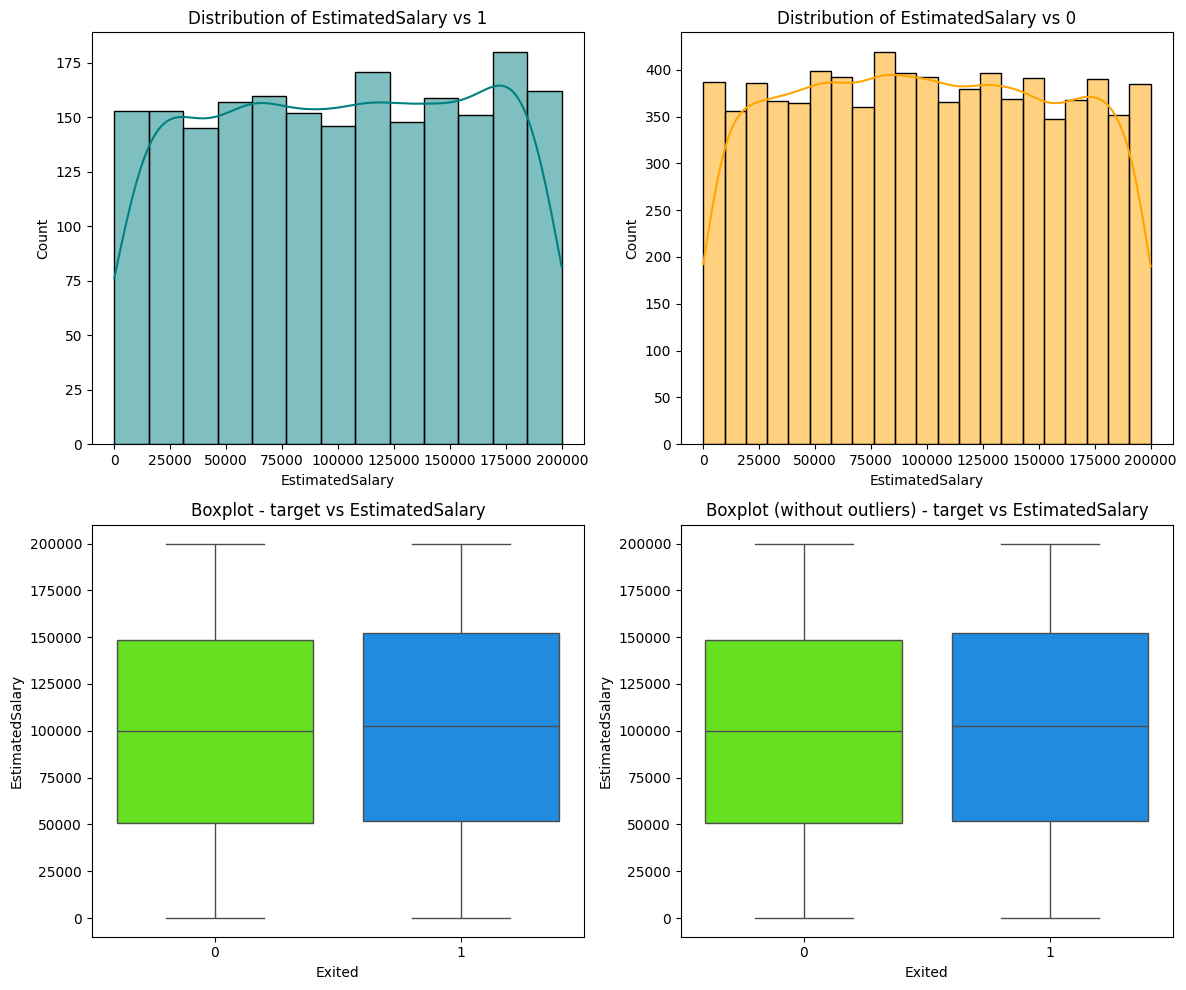

In [34]:
for col in num_cols:
  distribution_plot_wrt_target(df, col, target)

In [43]:
df.loc[df['Exited'] == 0, 'Age'].quantile(0.75) # 75th percentile age of existing customer

41.0

In [44]:
df.loc[df['Exited'] == 1, 'Age'].quantile(0.25) # 25th percentile age of churned customer

38.0

In [41]:
df.loc[df['Exited'] == 1, 'Balance'].quantile(0.25) # 25th percentile balance of churned customer

38340.02

In [42]:
df.loc[df['Exited'] == 0, 'Balance'].quantile(0.25) # 25th percentile balance of existing customer

0.0

In [49]:
df.loc[(df['Exited'] == 1) & (df['NumOfProducts'] == 4), 'Exited'].count() # Number of churned customer with 4 products

60

#### Correlation analysis (Numerical data)

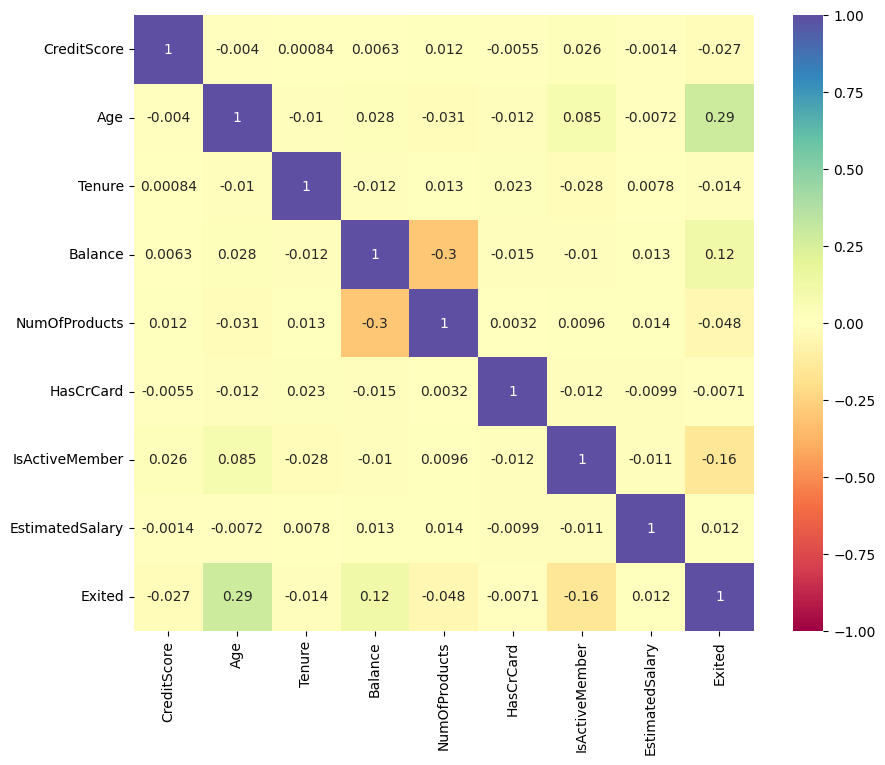

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = 'Spectral', vmin=-1, vmax=1)
plt.show()

#### Correlation analysis (Chi-square test for categorical data)

In [56]:
def chi_square_test(data, predictor, target):
  crosstab = pd.crosstab(data[predictor], data[target])
  Ho = f"{predictor} has no effect on {target}"  # Stating the Null Hypothesis
  Ha = f"{predictor} has an effect on {target}"  # Stating the Alternate Hypothesis

  chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

  if p_value < 0.05:  # Setting our significance level at 5%
      print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
  else:
      print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

In [57]:
for col in cat_cols:
  chi_square_test(data, col, target)

Geography has an effect on Exited as the p_value (0.0) < 0.05
Gender has an effect on Exited as the p_value (0.0) < 0.05
HasCrCard has no effect on Exited as the p_value (0.492) > 0.05
IsActiveMember has an effect on Exited as the p_value (0.0) < 0.05


#### Observations
* Chruning rate is the highest among customers based in Germany, around 32.4%
* Churning rate is high among female customers around 25%
* Churning rate among customers with or without credit card almost similar
* Inactive customers are more like to churn as around 26.8% inactive customers chruned within the last 6 months
* Customers who churned and who stayed have similar distribution of credit score
* It is observed that 75% customer who churned have higher age than the median age of the customers who didn't churn. 75% customers who stayed have age around 41 or less. 75% Customer who churned have age around 38 or more.
* 75% Customers who churned had tenure with the bank 8 years or less where as customers who stayed have tenure with bank 7 years or less.
* 75% customers who churned have balance around 38k or more, where as 25% of the customer who stayed has 0 balance.
* Customers who stayed purchased minimum 1 and maximum 3 products from the bank. 75% chruned customers purchased 2 products or less. There are 60 churned customers who had 4 products with the bank.
* Distribution of `EstimatedSalary` between two groups of customers who churned and who didn't churn, are almost similar.
* From the correlation heatmap, we observe that there are no strong correlation among features in the dataset.
* From chi-square test we observe that Geography, Gender and whether the customer is active or not have effects on our target variable.


## Data Preprocessing

### Dummy Variable Creation

### Train-validation-test Split

### Data Normalization

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


### Neural Network with SGD Optimizer

## Model Performance Improvement

### Neural Network with Adam Optimizer

### Neural Network with Adam Optimizer and Dropout

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations

*



<font size=6 color='blue'>Power Ahead</font>
___